# SF Giants Grading Contact Quality

The following project presents an algorithm to grade quality of contact of batted balls and trains three ML models to predict the grades.

The notebook contains a description of the data exploration, data cleaning, methodology used to grade the contact quality and the ML model testing and assesment. 

## Index

* [Data Exploration](#Data-Exploration)

* [Data Cleaning](#Data-Cleaning)

* [Methodology and Design Decision](#Methodology-and-Design-Decision)

* [Data Modeling](#Data-Modeling)

* [Models](#Models)

    - [Logistic Regression](#Logistic-Regression)
    - [Support Vector Machine Classifier](#Support-Vector-Machine-Classifier)
    - [Random Forest Classifier](#Random-Forest-Classifier)


* [Conclusions and Future Work](#Conclusions-and-Future-Work)

---

## Data Exploration

To begin with I am going to import the necessary libraries to work with the dataset. Then I´ll import the data directly for the Google Drive URL so I can read the data without the need of downloading it. 

Onece I have the data, I´ll start to explor it by looking at the whole dataframe, how many columns and rows it has, if there are any null values, I´ll check that all data types are correct and I´ll look at main statistics to see if there are any clear inconsistencies.

Finally, I´ll look for outliers to see if I need to remove them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NBprocessing import NBcategorical, NBcontinuous, NBplot, NBgeneral
from numpy import mean
from numpy import std
%matplotlib inline

In [2]:
"""DATA PREPROCESSING"""
# read data file
sheet_url = "https://docs.google.com/spreadsheets/d/1gKK_SBLbIEjfrctR7JcIUGku0uT2IHoh6ws9Zn5eXEI/edit#gid=1768011893"
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url)

#### Understanding the dataset

In [3]:
df.head(10)

,RowNum,pa_of_inning,pitch_of_pa,batter_side,pitcher_throws,outs,balls,strikes,tagged_pitch_type,hit_type,play_result,exit_speed,angle,direction,distance,bearing
0,1,1,1,Left,Right,0,0,0,Fastball,FlyBall,Out,97.59,37.44,22.93,357.86,32.90
1,2,3,3,Left,Right,2,1,1,ChangeUp,FlyBall,HomeRun,106.43,22.34,-0.55,406.45,-11.34
2,3,1,2,Left,Right,0,1,0,Slider,GroundBall,Out,79.62,-17.73,14.80,17.42,14.80
3,4,2,5,Right,Right,1,2,2,Fastball,FlyBall,Out,101.62,33.26,-10.41,365.32,-9.54
4,5,2,1,Left,Left,1,0,0,Fastball,LineDrive,Out,96.49,18.54,23.04,289.52,30.02
5,6,2,4,Left,Right,1,1,2,Splitter,GroundBall,Out,87.40,-3.42,42.64,20.21,36.39
6,7,3,2,Right,Left,2,1,0,Fastball,GroundBall,Single,101.32,11.66,-7.72,202.71,-11.09
7,8,3,5,Left,Right,2,3,1,Slider,GroundBall,Out,99.54,-19.66,37.52,10.97,27.31
8,9,3,2,Left,Right,2,0,1,Slider,LineDrive,Single,86.55,14.17,16.50,240.49,19.20
9,10,4,2,Right,Left,2,0,1,ChangeUp,FlyBall,Out,93.10,40.92,-10.80,355.79,-6.30


In [4]:
df.shape

(122893, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122893 entries, 0 to 122892
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RowNum             122893 non-null  int64  
 1   pa_of_inning       122893 non-null  int64  
 2   pitch_of_pa        122893 non-null  int64  
 3   batter_side        122893 non-null  object 
 4   pitcher_throws     122893 non-null  object 
 5   outs               122893 non-null  int64  
 6   balls              122893 non-null  int64  
 7   strikes            122893 non-null  int64  
 8   tagged_pitch_type  122893 non-null  object 
 9   hit_type           122893 non-null  object 
 10  play_result        122893 non-null  object 
 11  exit_speed         122789 non-null  float64
 12  angle              122789 non-null  float64
 13  direction          122789 non-null  float64
 14  distance           122789 non-null  float64
 15  bearing            122789 non-null  float64
dtypes:

In [6]:
df.dtypes

RowNum                 int64
pa_of_inning           int64
pitch_of_pa            int64
batter_side           object
pitcher_throws        object
outs                   int64
balls                  int64
strikes                int64
tagged_pitch_type     object
hit_type              object
play_result           object
exit_speed           float64
angle                float64
direction            float64
distance             float64
bearing              float64
dtype: object

In [7]:
df.describe()

,RowNum,pa_of_inning,pitch_of_pa,outs,balls,strikes,exit_speed,angle,direction,distance,bearing
count,122893.000000,122893.000000,122893.000000,122893.000000,122893.000000,122893.000000,122789.000000,122789.000000,122789.000000,122789.000000,122789.000000
mean,61447.000000,2.865574,3.412847,0.956303,1.112073,1.099876,87.741952,12.074525,-1.088212,167.034024,-0.593663
std,35476.297653,1.659672,1.846645,0.815157,1.012917,0.808908,14.510062,26.958108,23.035038,137.222650,25.037156
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.640000,-87.210000,-171.270000,0.240000,-179.920000
25%,30724.000000,2.000000,2.000000,0.000000,0.000000,0.000000,78.470000,-6.550000,-18.380000,21.860000,-20.560000
50%,61447.000000,3.000000,3.000000,1.000000,1.000000,1.000000,90.130000,12.360000,-1.490000,155.160000,-1.040000
75%,92170.000000,4.000000,5.000000,2.000000,2.000000,2.000000,98.870000,29.930000,15.840000,291.820000,19.070000
max,122893.000000,14.000000,14.000000,2.000000,4.000000,3.000000,128.860000,121.420000,177.050000,538.450000,179.660000


#### Checking for missing values

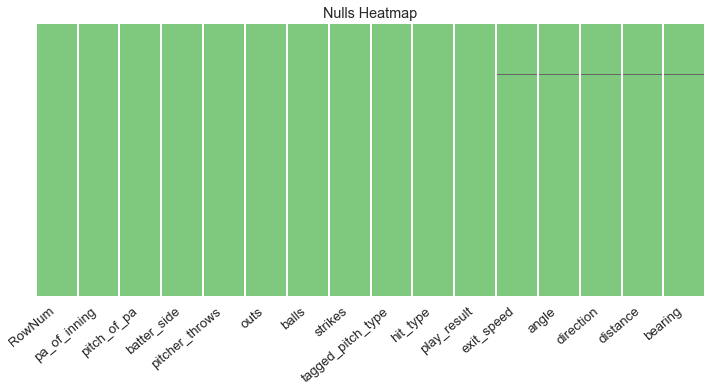

In [8]:
NBplot.plot_missing_value_heatmap(df)

# only the features "exit_speed", "angle", "direction", "distance", "bearing" have Na values

In [9]:
NBgeneral.missing_values(df)

,#Missing_values,%Missing_values
exit_speed,104,0.1
angle,104,0.1
direction,104,0.1
distance,104,0.1
bearing,104,0.1


In [10]:
# sum of NaN values for each feature
df.isna().sum()

RowNum                 0
pa_of_inning           0
pitch_of_pa            0
batter_side            0
pitcher_throws         0
outs                   0
balls                  0
strikes                0
tagged_pitch_type      0
hit_type               0
play_result            0
exit_speed           104
angle                104
direction            104
distance             104
bearing              104
dtype: int64

#### Looking for outliers

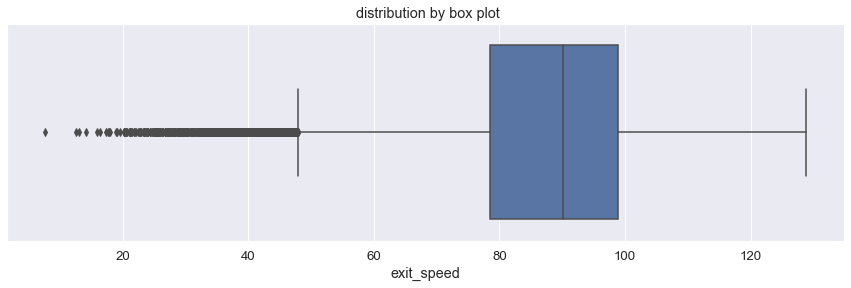

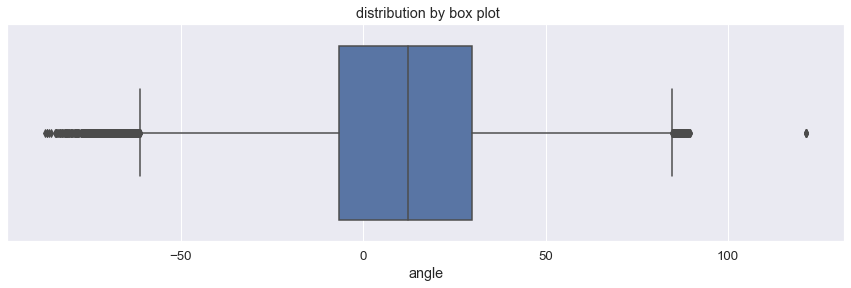

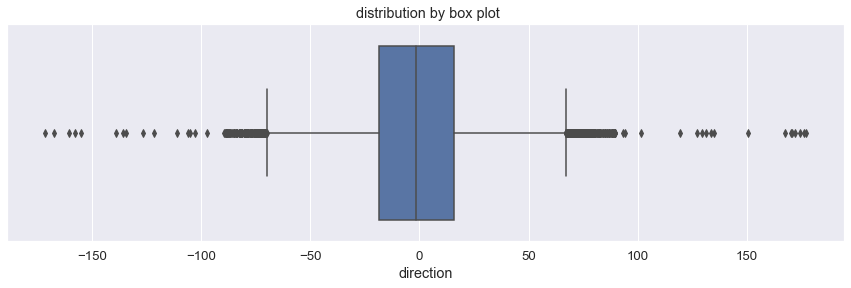

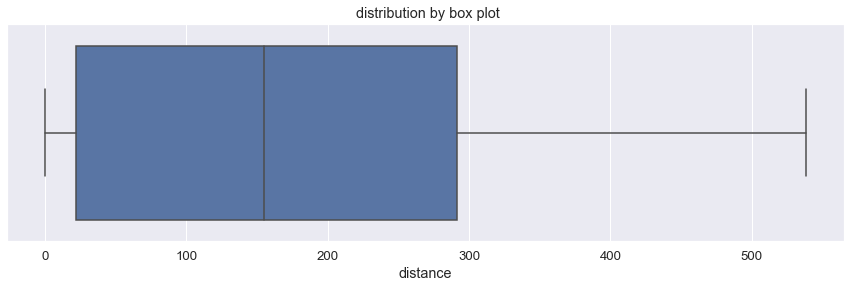

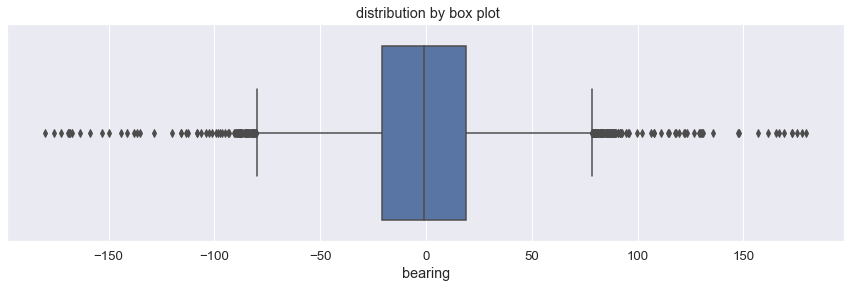

In [11]:
# plotting outliers
for col in ["exit_speed", "angle", "direction", "distance", "bearing"]: # selecting the numeric columns that will be use in the contact grading and model
    plt.figure(figsize=(15,4))
    g = sns.boxplot(x=df[col])
    g.set(title=" distribution by box plot")
    plt.show()

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



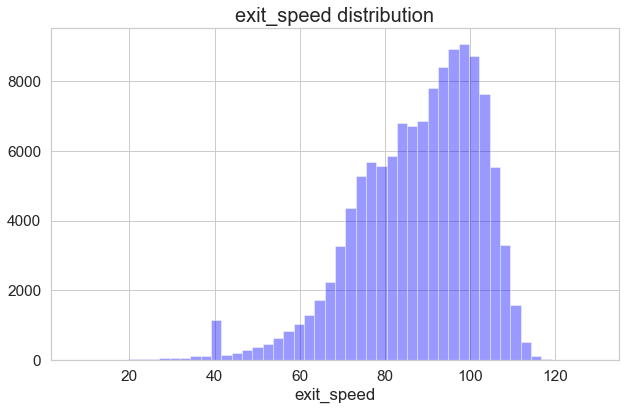

In [12]:
NBplot.distribution_plot(df,["exit_speed"])

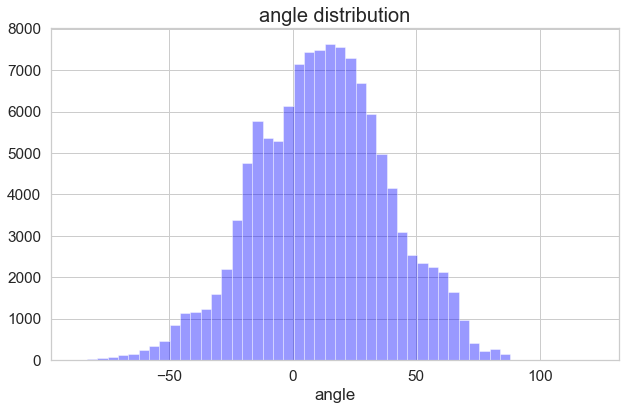

In [13]:
NBplot.distribution_plot(df,["angle"])

In [14]:
# looking for number of undefined labels 
df.hit_type.value_counts()

GroundBall    52409
LineDrive     30869
FlyBall       29142
Popup          8919
Bunt           1521
Undefined        33
Name: hit_type, dtype: int64

In [15]:
df.play_result.value_counts()

Out               74381
Single            25393
Double             8296
HomeRun            6610
FieldersChoice     4184
Sacrifice          1871
Error              1314
Triple              768
Undefined            76
Name: play_result, dtype: int64

In [16]:
df["hit_type"].unique()

array(['FlyBall', 'GroundBall', 'LineDrive', 'Popup', 'Bunt', 'Undefined'],
      dtype=object)

In [17]:
df["play_result"].unique()

array(['Out', 'HomeRun', 'Single', 'FieldersChoice', 'Double', 'Triple',
       'Sacrifice', 'Error', 'Undefined'], dtype=object)

### Insights

#### Statistics

- exit_speed: the mean is 87.74 and median is 90.13,  however the max is 128.86 which seems odd as the fastest ball ever hit recorded by statcast is 124 MPH. 

- angle: mean and median are the same, 12, so we have a normal distribution. The max value is 121.4, which is probably an incorrect measurement as angle values can only be between 90º and -90º. 

#### Info

There are 104 missing values on the features "exit_speed", "angle", "direction", "distance", "bearing".

#### Unique Values

There are "Undefined" values on multiple columns. I am going to focuse on "hit_type" and "play_result" features as they have unconsistent measurements when the action is tagged as "Undefined".

---

## Data Cleaning

I am going to remove all rows with Na values and "Undefined" labels from columns "hit_type" and "play_result".

Also, I´ll remove values on the "exit_speed" above 124 MPH as this is the fastests ball ever hit recorded by statcast and in this data set there are 4 records above this value. 

I´ll get rid of the values that are above 90º as the launch angles fall between 90º and -90º.

In [18]:
clean_df = df.copy()

In [19]:
# keeping the rows that don´t contain undefined records for columns hit_type and player_result
clean_df = clean_df.loc[~((clean_df["hit_type"]=="Undefined") | (clean_df["play_result"]=="Undefined"))]

In [20]:
# since there is only a few amount of Na values I'll remove all of them instead of filling them with the median. 
clean_df.dropna(inplace=True)

In [21]:
# exit_speed outliers
clean_df = clean_df.query("exit_speed < 124")

In [22]:
# values above 90ª
clean_df = clean_df.loc[~((clean_df["angle"] > 90))]

---

## Methodology and Design Decision

My initial idea was to binary classify each batted ball between barrel(1) or not-barrel(0) following the statcast logic http://m.mlb.com/glossary/statcast/barrel.

However I wanted to provide a more thorough grading so I extended the classification of each batted ball to 6 labels (Weak, Topped, Under, Flare/Burner, Solid Contact and Barrel) following the statcast "launch_speed_angle".

To create the classification function I use some ideas from https://www.pitcherlist.com/beyond-the-barrel-an-introduction-to-ideal-contact-rate/ which helped with the coding logic. 

In [23]:
"""ALGORITHM TO GRADE THE QUALITY OF CONTACT"""

def classification(df): 
    
    """
    This function takes a data frame 
    as parameter and checks for each condition 
    and classifies each instance in one of the 7 categories: 
    6 = Barrel, 5 = Solid Contact, 1 = Weak Contact
    4 = Flare/Burner, 3 = Poorly-Under, 2 = Poorly-Topped 
    and 0 = Unclassified
    """
        
    if (df["exit_speed"] * 1.5 - df["angle"]) >= 117.00 and (df["exit_speed"] + df["angle"]) >= 124 and (df["exit_speed"]) >= 98 and 8 <= df["angle"] <= 50:
        return 6 #"Barrel"
    elif (df["exit_speed"] * 1.5 - df["angle"]) >= 111.00 and (df["exit_speed"] + df["angle"]) >= 119 and (df["exit_speed"]) >= 95 and 0 <= df["angle"] <= 52:
        return 5 #"Solid"
    elif (df["exit_speed"] * 1.5 - df["angle"]) >= 111.00 and (df["exit_speed"] + df["angle"]) >= 119 and (df["exit_speed"]) >= 59 and 0 <= df["angle"] <= 52:
        return 1 #"Weak"
    elif (df["exit_speed"] * 2 - df["angle"]) >= 87 and df["angle"] <= 41 and (df["exit_speed"] * 2 + df["angle"]) <= 175 and (df["exit_speed"] + df["angle"] * 1.3) >= 89 and 59 <= df["exit_speed"] <= 72:
        return 4 #"Burner"
    elif (df["exit_speed"] + df["angle"] * 1.3) <= 112 and (df["exit_speed"] + df["angle"] * 1.55) >= 92 and 72 <= df["exit_speed"] <=86:
        return 4 #"Burner"
    elif df["angle"] <= 20 and (df["exit_speed"] + df["angle"] * 2.4) >= 98 and 86 <= df["exit_speed"] <= 95:
        return 4 #"Burner"
    elif (df["exit_speed"] - df["angle"]) >= 76 and (df["exit_speed"] + df["angle"] * 2.4) >= 98 and df["exit_speed"] >= 95 and df["angle"] <= 30:
        return 4 #"Burner"
    elif (df["exit_speed"] + df["angle"] * 2) >= 116:
        return 3 #"Poorly-Under"
    elif (df["exit_speed"] + df["angle"] * 2) <= 116:
        return 2 #"Poorly-Topped"
    else:
        return 0 #"Unclassified"

Selecting the features that will be use in the model. 

In [24]:
new_df = clean_df.loc[:,'exit_speed':]

Adding a new column with the contact_quality classification to the new df.

In [25]:
new_df["contact_quality"] = new_df.apply(classification, axis=1)
new_df

,exit_speed,angle,direction,distance,bearing,contact_quality
0,97.59,37.44,22.93,357.86,32.90,3
1,106.43,22.34,-0.55,406.45,-11.34,6
2,79.62,-17.73,14.80,17.42,14.80,2
3,101.62,33.26,-10.41,365.32,-9.54,6
4,96.49,18.54,23.04,289.52,30.02,4
...,...,...,...,...,...,...
122888,105.68,6.09,-7.62,202.98,-7.22,4
122889,83.69,14.36,3.59,185.64,7.67,4
122890,103.55,-16.64,-7.43,8.92,-8.94,2
122891,85.77,40.56,17.25,282.87,29.44,3


Looking for imbalances.

In [26]:
new_df.contact_quality.value_counts()

2    44702
3    31437
4    30341
6     8469
5     7139
1      610
Name: contact_quality, dtype: int64

<AxesSubplot:xlabel='contact_quality', ylabel='count'>

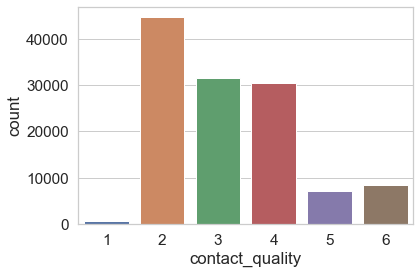

In [27]:
sns.countplot(x="contact_quality", data=new_df)

In [28]:
# There´s a notable imbalance between contact_quality grades 2, 3, 4 and 1, 5, 6. <br>
# I´ll try to balanced it using the parameter stratify when splitting the data for ML. 

---

## Data Modeling

I am going to split the dataset between train 80% and test 20% and I will train the model with the 80% of the data and I will use the test data to assess the model.


### 1. Train-test split

In [29]:
from sklearn.model_selection import train_test_split
# define X and y (features and target)
X = new_df.iloc[:,:5]
y = new_df.iloc[:,5:6]
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y) # since we have an imbalance dataset I am stratifying y to balance it 
# printing shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(98158, 5) (24540, 5) (98158, 1) (24540, 1)


In [30]:
# integrity check to the split
print(f"the length of featuers columns in X_train is {len(X_train)}")
print(f"the length of featuers columns in X_test is {len(X_test)}")
print(f"the length of featuers columns in data base is {len(new_df)}")
print(f"the delta between all is data sets and data base is :",len(new_df)-len(X_train)-len(X_test))
print("")
print(f"Number of columns in X_train is {len(X_train.columns)}")
print(f"Number of columns in X_test is {len(X_test.columns)}")
print(f"Number of columns in data base is {len(new_df.columns)}")

the length of featuers columns in X_train is 98158
the length of featuers columns in X_test is 24540
the length of featuers columns in data base is 122698
the delta between all is data sets and data base is : 0

Number of columns in X_train is 5
Number of columns in X_test is 5
Number of columns in data base is 6


### 2. Pre-processing

#### 2.1. Feature Scaling

Since our features have different ranges, I´ll use a scaler to standardize them.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initiate transformer
X_train = scaler.fit_transform(X_train) # scale data

#### 2.2. Preprocessing the test set

In [32]:
X_test = scaler.transform(X_test)

---

## Models

For this analysis I´ll use three different models to see which one performs best with the dataset we have:

- Logistic Regression

- Support Vector Machine

- Random Forest

#### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

Evaluating multinominal logistic regression for multi-class classification

In [34]:
# flattening array
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

# multinomial logistic regression model
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating the model
n_scores = cross_val_score(model_lr, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# reporting the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.925 (0.002)


We can see that the multinomial logistic regression model achieved a mean classification accuracy of about 92.5 percent on our train dataset.

Let´s now fit our model with the train data and check the score for the test data.

In [42]:
# fitting model
model_lr.fit(X_train, y_train)

# predictions
lr_y_pred = model_lr.predict(X_test)

# model score
model_lr.score(X_test, y_test)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9265281173594132

Again we get a similar result for the test data with a 92.6 percent. 

#### Validation & Accuracy

In [43]:
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.metrics import plot_confusion_matrix

In [44]:
# Intercept and Coefficients

# print model parameters
print('Intercept: \n', model_lr.intercept_)
print('Coefficients: \n', model_lr.coef_)

Intercept: 
 [ -1.19374712   3.47635267   6.8036398   14.72727952  -3.56581095
 -20.24771392]
Coefficients: 
 [[-1.43993836e+00  6.61221627e+00  3.26228106e-01  4.05648330e+00
  -2.56950687e-01]
 [-1.29536406e+01 -2.63133102e+01 -1.28951520e+00 -1.27589593e+01
   1.29905484e+00]
 [-1.39034815e+00  1.06618164e+01  4.62373947e-01 -1.90147568e+00
  -5.11205521e-01]
 [-4.21238181e+00 -6.98752784e+00  1.72057364e-01 -2.41135829e+00
  -2.47011424e-01]
 [ 6.91426327e+00  7.52915501e+00  2.39125767e-01  3.08764685e+00
  -2.81826701e-01]
 [ 1.30820457e+01  8.49765033e+00  8.97300155e-02  9.92766311e+00
  -2.06050292e-03]]


In [45]:
# calculate odds ratio estimates
np.exp(model_lr.coef_)

array([[2.36942364e-01, 7.44130386e+02, 1.38573143e+00, 5.77707910e+01,
        7.73406352e-01],
       [2.36758377e-06, 3.73486212e-12, 2.75404267e-01, 2.87643383e-06,
        3.66583022e+00],
       [2.48988605e-01, 4.26941184e+04, 1.58783896e+00, 1.49348066e-01,
        5.99772105e-01],
       [1.48110492e-02, 9.23326323e-04, 1.18774596e+00, 8.96933821e-02,
        7.81131770e-01],
       [1.00652921e+03, 1.86153186e+03, 1.27013827e+00, 2.19254234e+01,
        7.54404411e-01],
       [4.80242122e+05, 4.90323429e+03, 1.09387891e+00, 2.04894030e+04,
        9.97941618e-01]])

In [46]:
# evaluating the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)))

Mean Absolute Error: 0.0973920130399348
Mean Squared Error: 0.14596577017114915
Root Mean Squared Error: 0.38205466908696345


In [47]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import cohen_kappa_score

In [48]:
# accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, lr_y_pred), "\n")  

# create classification report
lr_class_report = classification_report(y_test, lr_y_pred)
print(lr_class_report)

Accuracy Score: 0.9265281173594132 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       122
           2       0.99      0.99      0.99      8941
           3       0.93      0.94      0.93      6287
           4       0.93      0.93      0.93      6068
           5       0.64      0.66      0.65      1428
           6       0.84      0.85      0.84      1694

    accuracy                           0.93     24540
   macro avg       0.72      0.73      0.72     24540
weighted avg       0.92      0.93      0.92     24540



/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [49]:
# cohen´s kappa statistic
lr_cohen_kappa = cohen_kappa_score(y_test, lr_y_pred)
print("Cohen’s Kappa Score:", lr_cohen_kappa)

Cohen’s Kappa Score: 0.8995387196893412


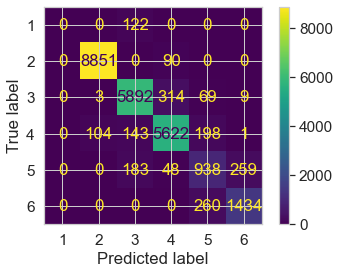

In [50]:
# create a confusion matrix
plot_confusion_matrix(model_lr, X_test, y_test) 

---

#### Support Vector Machine Classifier

In [51]:
from sklearn import svm
from sklearn.svm import SVC

In [52]:
# support vector classifier model
model_svm = svm.SVC(decision_function_shape='ovo')

In [53]:
# fitting model
model_svm.fit(X_train, y_train)

# predictions
svc_y_pred = model_svm.predict(X_test)

#### Validation & Accuracy

In [54]:
# evaluating the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svc_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svc_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svc_y_pred)))

Mean Absolute Error: 0.05338223308883456
Mean Squared Error: 0.08679706601466992
Root Mean Squared Error: 0.29461341791349205


In [55]:
# accuracy statistics
print("SVC Accuracy:",metrics.accuracy_score(y_test, svc_y_pred), "\n")

# create classification report
svc_class_report = classification_report(y_test, svc_y_pred)
print(svc_class_report)

SVC Accuracy: 0.9624694376528118 

              precision    recall  f1-score   support

           1       1.00      0.02      0.03       122
           2       0.99      0.99      0.99      8941
           3       0.96      0.98      0.97      6287
           4       0.97      0.97      0.97      6068
           5       0.81      0.83      0.82      1428
           6       0.91      0.90      0.90      1694

    accuracy                           0.96     24540
   macro avg       0.94      0.78      0.78     24540
weighted avg       0.96      0.96      0.96     24540



In [56]:
# cohen´s kappa statistic
svc_cohen_kappa = cohen_kappa_score(y_test, svc_y_pred)
print("Cohen’s Kappa Score:", svc_cohen_kappa)

Cohen’s Kappa Score: 0.948671410527936


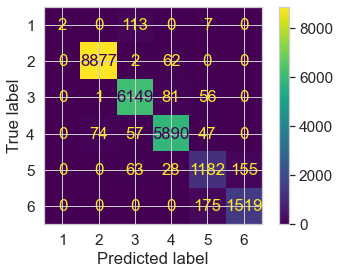

In [57]:
# create a confusion matrix
plot_confusion_matrix(model_svm, X_test, y_test) 

---

#### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# create a Gaussian Classifier
model_rf = RandomForestClassifier(n_estimators=100)

In [60]:
# fitting model
model_rf.fit(X_train,y_train)

# predictions
rf_y_pred = model_rf.predict(X_test)

#### Validation & Accuracy

In [61]:
# evaluating the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred)))

Mean Absolute Error: 0.012184189079054605
Mean Squared Error: 0.020171149144254278
Root Mean Squared Error: 0.1420251708122693


In [62]:
# accuracy statistics
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, rf_y_pred), "\n")

# create classification report
rf_class_report = classification_report(y_test, rf_y_pred)
print(rf_class_report)

Random Forest Accuracy: 0.9918092909535452 

              precision    recall  f1-score   support

           1       0.96      0.91      0.93       122
           2       1.00      1.00      1.00      8941
           3       0.99      0.99      0.99      6287
           4       0.99      0.99      0.99      6068
           5       0.96      0.97      0.97      1428
           6       0.99      0.99      0.99      1694

    accuracy                           0.99     24540
   macro avg       0.98      0.97      0.98     24540
weighted avg       0.99      0.99      0.99     24540



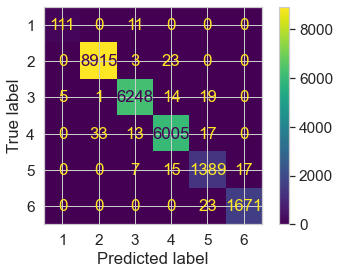

In [63]:
# creating a confusion matrix
plot_confusion_matrix(model_rf, X_test, y_test) 

In [66]:
# cohen´s kappa statistic
rf_cohen_kappa = cohen_kappa_score(y_test, rf_y_pred)
print("Cohen’s Kappa Score:", rf_cohen_kappa)

Cohen’s Kappa Score: 0.9888153154121347


---

Creating a table with all the scores and errors

In [64]:
# results table
data = [{"Accuracy": metrics.accuracy_score(y_test, lr_y_pred), "Cohen´s Kappa": cohen_kappa_score(y_test, lr_y_pred), "MAE": metrics.mean_absolute_error(y_test, lr_y_pred), "MSE": metrics.mean_squared_error(y_test, lr_y_pred), "RMSE": np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))}, 
        {"Accuracy": metrics.accuracy_score(y_test, svc_y_pred), "Cohen´s Kappa": cohen_kappa_score(y_test, svc_y_pred), "MAE": metrics.mean_absolute_error(y_test, svc_y_pred) , "MSE": metrics.mean_squared_error(y_test, svc_y_pred), "RMSE": np.sqrt(metrics.mean_squared_error(y_test, svc_y_pred))},
       {"Accuracy": metrics.accuracy_score(y_test, rf_y_pred), "Cohen´s Kappa": cohen_kappa_score(y_test, rf_y_pred), "MAE": metrics.mean_absolute_error(y_test, rf_y_pred) , "MSE": metrics.mean_squared_error(y_test, rf_y_pred), "RMSE": np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))}]

results = pd.DataFrame(data, index =["Logistic Regression", 
                                 "SVC", "Random Forest"],
                   columns =["Accuracy", "Cohen´s Kappa", "MAE", "MSE", "RMSE"]) 

---

## Conclusions and Future Work

Once completed the training of the models, we see that all three produced high accuracies, however focusing just on the accuracy it can be misleading as we are working with an imbalance dataset and the accuracy might be only reflecting the underlying class distribution. 

To ensure the results obtained are reliable and our models are robust, I also computed other performance measure: Precision, Recall, F1-score, Cohen´s Kappa and confusion matrix. 

As we can see on the tables below, all the measures provided strong results with values close to 1 and low errors. 
The Cohen´s Kappa for all the models confirms the high level of agreement, which ensures that the accuracies obtained are not due to a class been larger than the rest.  



*Future Work* 

The model that presented the best scores is the Random Forest Classifier, hence I would continue to work on its robustnes.

To improve the model I would: 

- Balance the dataset
    - Collecting more examples of minor classes. 
    - Resampling the dataset either by over-sampling or under-sampling.
    - Synthetic Samples (SMOTE)
    
    
- Fine tuning parameters
    - GridSearch with Cross Validation
    - RandomizedSearchCV

In [65]:
print("PERFORMANCE MEASURES \n")
print(results, "\n")
print("LOGISTIC REGRESSION CLASS REPORT\n")
print(lr_class_report,"\n")
print("SVC CLASS REPORT \n")
print(svc_class_report,"\n")
print("RANDOM FOREST CLASS REPORT")
print(rf_class_report)

PERFORMANCE MEASURES 

                     Accuracy  Cohen´s Kappa       MAE       MSE      RMSE
Logistic Regression  0.926528       0.899539  0.097392  0.145966  0.382055
SVC                  0.962469       0.948671  0.053382  0.086797  0.294613
Random Forest        0.991809       0.988815  0.012184  0.020171  0.142025 

LOGISTIC REGRESSION CLASS REPORT

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       122
           2       0.99      0.99      0.99      8941
           3       0.93      0.94      0.93      6287
           4       0.93      0.93      0.93      6068
           5       0.64      0.66      0.65      1428
           6       0.84      0.85      0.84      1694

    accuracy                           0.93     24540
   macro avg       0.72      0.73      0.72     24540
weighted avg       0.92      0.93      0.92     24540
 

SVC CLASS REPORT 

              precision    recall  f1-score   support

           1       1.0